In [385]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [386]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [387]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [388]:
df_Japan=df[df['country']=='Japan']
df_Japan.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
27,28,Japan,Tokyo,Studio,Semi-Furnished,3154,1423466,1997,6,1,...,37705,928240,30,3590,495226,0.16,1,4,5,0
31,32,Japan,Kyoto,Townhouse,Unfurnished,3043,1366579,2002,2,7,...,48015,623228,25,17915,743351,0.09,10,10,8,1
40,41,Japan,Kyoto,Townhouse,Fully-Furnished,4530,2042444,1976,4,4,...,17015,929248,25,10120,1113196,0.37,1,10,6,0
45,46,Japan,Tokyo,Villa,Semi-Furnished,3711,1671717,2020,6,2,...,41095,721498,25,15800,950219,0.12,2,3,8,0
56,57,Japan,Tokyo,Independent House,Semi-Furnished,694,317164,1995,6,3,...,38955,264856,15,18695,52308,0.06,2,1,5,0


#### We will remove irrelevant variables and avoid model cheating.

In [389]:
df_Japan=df_Japan.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [390]:
df_Japan.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
27,Japan,Studio,Semi-Furnished,3154,1423466,1997,1,1,1,1
31,Japan,Townhouse,Unfurnished,3043,1366579,2002,7,6,1,1
40,Japan,Townhouse,Fully-Furnished,4530,2042444,1976,4,1,1,0
45,Japan,Villa,Semi-Furnished,3711,1671717,2020,2,2,0,0
56,Japan,Independent House,Semi-Furnished,694,317164,1995,3,1,1,0


In [391]:
df_Japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15317 entries, 27 to 199997
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15317 non-null  object
 1   property_type       15317 non-null  object
 2   furnishing_status   15317 non-null  object
 3   property_size_sqft  15317 non-null  int64 
 4   price               15317 non-null  int64 
 5   constructed_year    15317 non-null  int64 
 6   rooms               15317 non-null  int64 
 7   bathrooms           15317 non-null  int64 
 8   garage              15317 non-null  int64 
 9   garden              15317 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [392]:
df_Japan.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15317.000000,1.531700e+04,15317.000000,15317.000000,15317.000000,15317.000000,15317.000000
mean,3194.370177,1.437475e+06,1991.335771,4.500816,2.740876,0.497943,0.499380
std,1624.296911,7.309502e+05,18.439181,2.294196,1.826264,0.500012,0.500016
min,401.000000,1.757350e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1801.000000,8.092160e+05,1975.000000,2.000000,1.000000,0.000000,0.000000
50%,3179.000000,1.429745e+06,1991.000000,5.000000,2.000000,0.000000,0.000000
75%,4599.000000,2.069760e+06,2007.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,2.703971e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [393]:
df_Japan.shape

(15317, 10)

In [394]:
df_Japan.value_counts()

country  property_type      furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Japan    Apartment          Fully-Furnished    409                 188311   1997              3      3          0       1         1
         Townhouse          Fully-Furnished    1075                486714   1992              7      1          0       0         1
                                               1000                449588   1988              8      3          0       0         1
                                               1012                451252   2022              6      6          0       1         1
                                               1018                456947   1974              7      6          0       0         1
                                                                                                                                 ..
         Independent House  Fully-Furnished    809                 365226   1991 

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999992         -0.004392 -0.031991   
price                         0.999992  1.000000         -0.004393 -0.031988   
constructed_year             -0.004392 -0.004393          1.000000 -0.007447   
rooms                        -0.031991 -0.031988         -0.007447  1.000000   
bathrooms                    -0.019726 -0.019726         -0.001674  0.623221   
garage                       -0.002293 -0.002296          0.014468 -0.004936   
garden                        0.001925  0.001941         -0.006276 -0.009377   

                    bathrooms    garage    garden  
property_size_sqft  -0.019726 -0.002293  0.001925  
price               -0.019726 -0.002296  0.001941  
constructed_year    -0.001674  0.014468 -0.006276  
rooms                0.623221 -0.004936 -0.009377  
bathrooms            1.000000 -0.001620 -0.000855  
garage              -0.001620  1.000000  0.0107

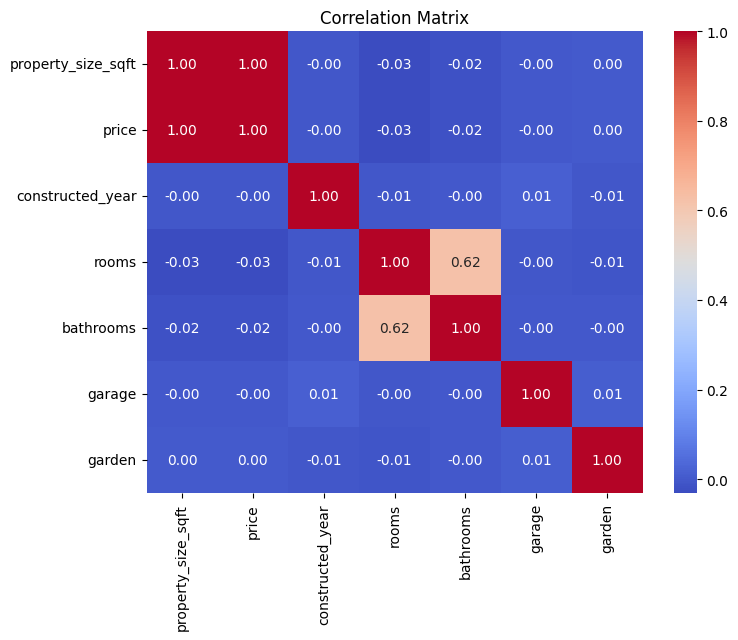

In [395]:
correlation_matrix = df_Japan.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [396]:
df_Japan=pd.get_dummies(df_Japan, columns=['property_type', 'furnishing_status'])
df_Japan.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
27,Japan,3154,1423466,1997,1,1,1,1,False,False,False,True,False,False,False,True,False
31,Japan,3043,1366579,2002,7,6,1,1,False,False,False,False,True,False,False,False,True
40,Japan,4530,2042444,1976,4,1,1,0,False,False,False,False,True,False,True,False,False
45,Japan,3711,1671717,2020,2,2,0,0,False,False,False,False,False,True,False,True,False
56,Japan,694,317164,1995,3,1,1,0,False,False,True,False,False,False,False,True,False


In [397]:
df_Japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15317 entries, 27 to 199997
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15317 non-null  object
 1   property_size_sqft                 15317 non-null  int64 
 2   price                              15317 non-null  int64 
 3   constructed_year                   15317 non-null  int64 
 4   rooms                              15317 non-null  int64 
 5   bathrooms                          15317 non-null  int64 
 6   garage                             15317 non-null  int64 
 7   garden                             15317 non-null  int64 
 8   property_type_Apartment            15317 non-null  bool  
 9   property_type_Farmhouse            15317 non-null  bool  
 10  property_type_Independent House    15317 non-null  bool  
 11  property_type_Studio               15317 non-null  bool  
 12  propert

In [398]:
X=df_Japan.drop(['price', 'country'], axis=1)
y=df_Japan['price']

In [399]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [400]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999845247588482
Linier Regresion RMSE :  2893.9244803179777


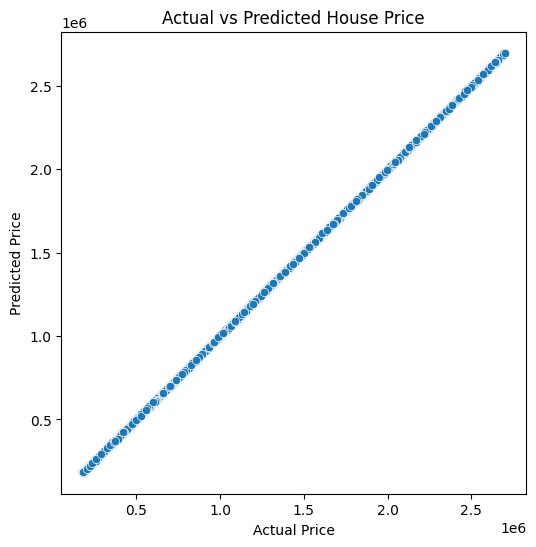

In [401]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [402]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9999660660618356
Decision Tree RMSE :  4285.343239556127


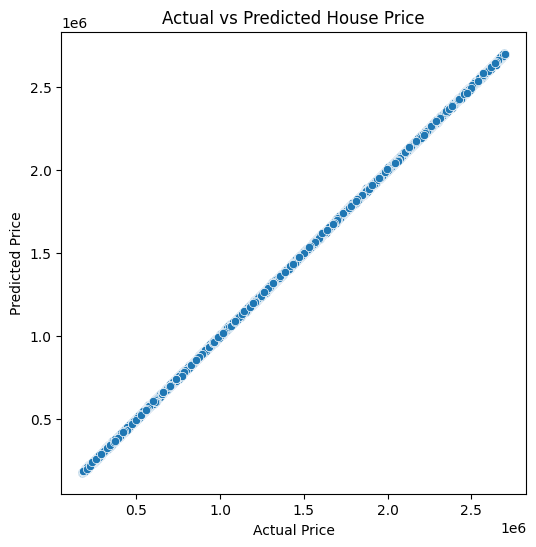

In [403]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [404]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999806841691508
Random Forest RMSE :  4285.343239556127


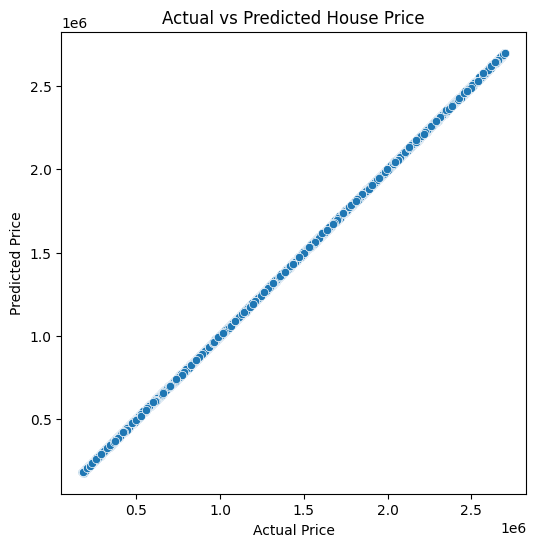

In [405]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [406]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.999937948567401
Gradient Boost RMSE :  4285.343239556127


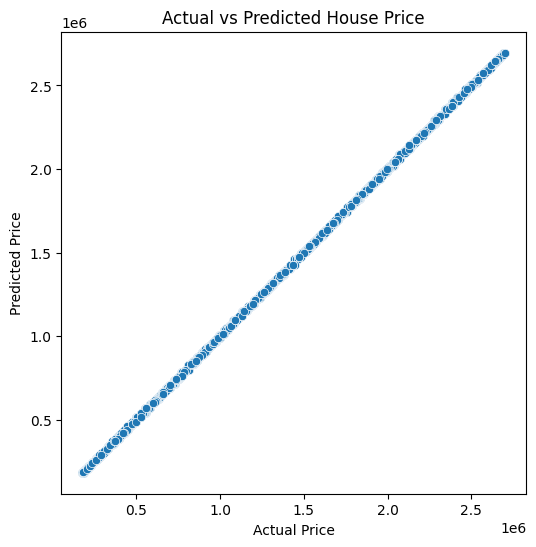

In [407]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [408]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [409]:
result

,metode,R²,RMSE
0,lr,0.999985,2893.924480
1,dt,0.999966,4285.343240
2,rf,0.999981,3233.144966
3,gb,0.999938,5794.879202
